In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
file_path = 'student_sleep_patterns.csv'
df = pd.read_csv(file_path)

In [19]:
df.shape

(500, 15)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Student_ID           500 non-null    int64   
 1   Age                  500 non-null    int64   
 2   Gender               500 non-null    category
 3   University_Year      500 non-null    category
 4   Sleep_Duration       500 non-null    float64 
 5   Study_Hours          500 non-null    float64 
 6   Screen_Time          500 non-null    float64 
 7   Caffeine_Intake      500 non-null    int64   
 8   Physical_Activity    500 non-null    int64   
 9   Sleep_Quality        500 non-null    int64   
 10  Weekday_Sleep_Start  500 non-null    object  
 11  Weekend_Sleep_Start  500 non-null    object  
 12  Weekday_Sleep_End    500 non-null    float64 
 13  Weekend_Sleep_End    500 non-null    float64 
 14  Weekend_vs_Weekday   500 non-null    float64 
dtypes: category(2), float64

In [21]:
df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_End,Weekend_Sleep_End,Weekend_vs_Weekday
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,6.929900,8.988100,2.058200
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,1.183174,1.111253,1.624325
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,5.000000,7.020000,-1.930000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,5.900000,8.047500,0.917500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,6.885000,9.005000,2.065000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,7.972500,9.925000,3.240000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,8.980000,10.990000,5.820000


In [22]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
Weekend_vs_Weekday     0
dtype: int64


In [31]:
df.duplicated().sum()

0

In [41]:
dict(df.nunique())

{'Student_ID': 500,
 'Age': 8,
 'Gender': 3,
 'University_Year': 4,
 'Sleep_Duration': 51,
 'Study_Hours': 116,
 'Screen_Time': 31,
 'Caffeine_Intake': 6,
 'Physical_Activity': 120,
 'Sleep_Quality': 10,
 'Weekday_Sleep_Start': 452,
 'Weekend_Sleep_Start': 442,
 'Weekday_Sleep_End': 289,
 'Weekend_Sleep_End': 297,
 'Weekend_vs_Weekday': 423}

In [42]:
print("\nUnique Values:\n", df['Gender'].unique(),"\n", df['University_Year'].unique())


Unique Values:
 ['Other', 'Male', 'Female']
Categories (3, object): ['Female', 'Male', 'Other'] 
 ['2nd Year', '1st Year', '4th Year', '3rd Year']
Categories (4, object): ['1st Year', '2nd Year', '3rd Year', '4th Year']


In [43]:
# Converting to categorical columns
df['Gender'] = df['Gender'].astype('category')
df['University_Year'] = df['University_Year'].astype('category')

# Converting time fields from float to hours:minutes
df['Weekday_Sleep_Start'] = pd.to_datetime(df['Weekday_Sleep_Start'], unit='h').dt.time
df['Weekend_Sleep_Start'] = pd.to_datetime(df['Weekend_Sleep_Start'], unit='h').dt.time

ValueError: unit='h' not valid with non-numerical val='14:09:36', at position 0

In [11]:
# Saving cleaned dataset to a new CSV
df.to_csv("cleaned_data.csv", index=False)

In [44]:
df = pd.read_csv("cleaned_data.csv")
df.head()


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14:09:36,04:03:00,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,08:43:48,07:06:00,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20:00:00,20:28:12,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19:49:12,04:04:48,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20:58:48,06:07:12,8.98,9.01


In [51]:
plt.figure()
sns.histplot(df['Sleep_Duration'], kde=True, bins=10, color="Teal")
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

OSError: 'dark-background' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

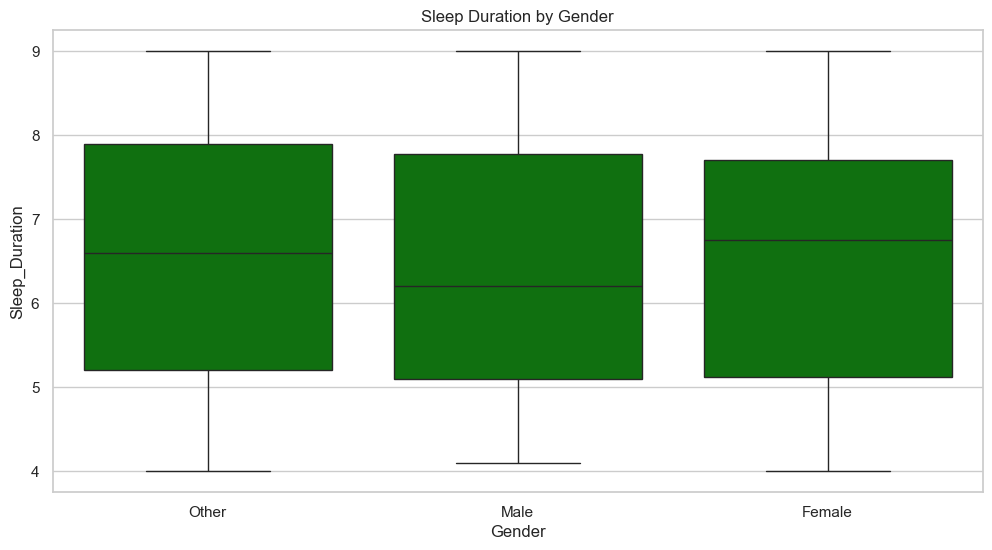

In [52]:
plt.figure()
sns.boxplot(x='Gender', y='Sleep_Duration', data=df, color="green")
plt.title('Sleep Duration by Gender')
plt.show()

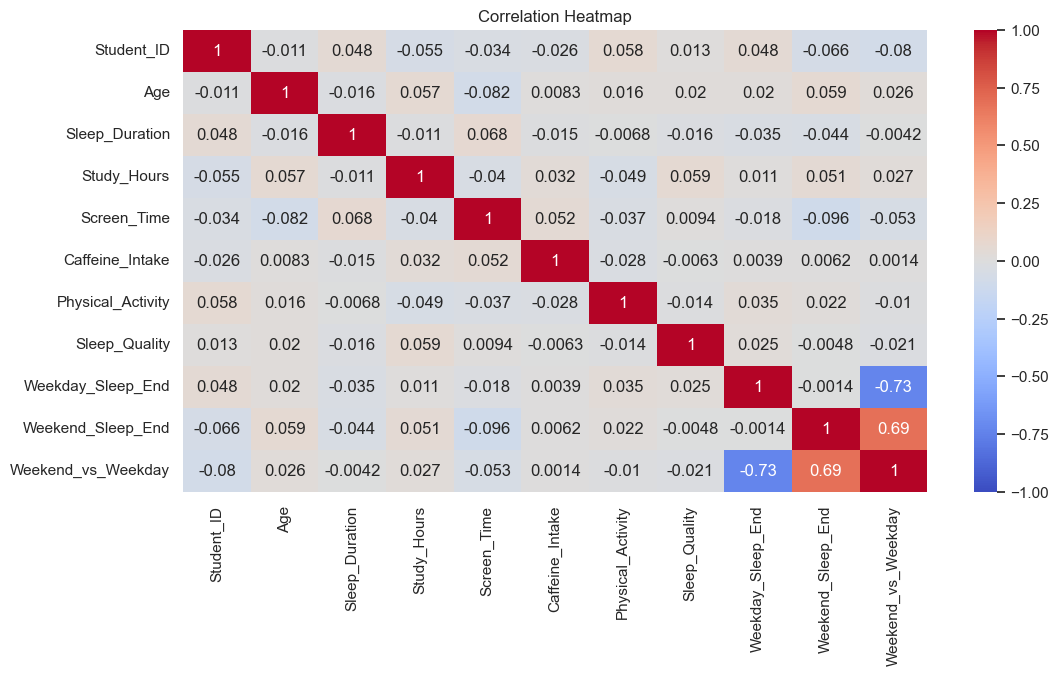

In [53]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

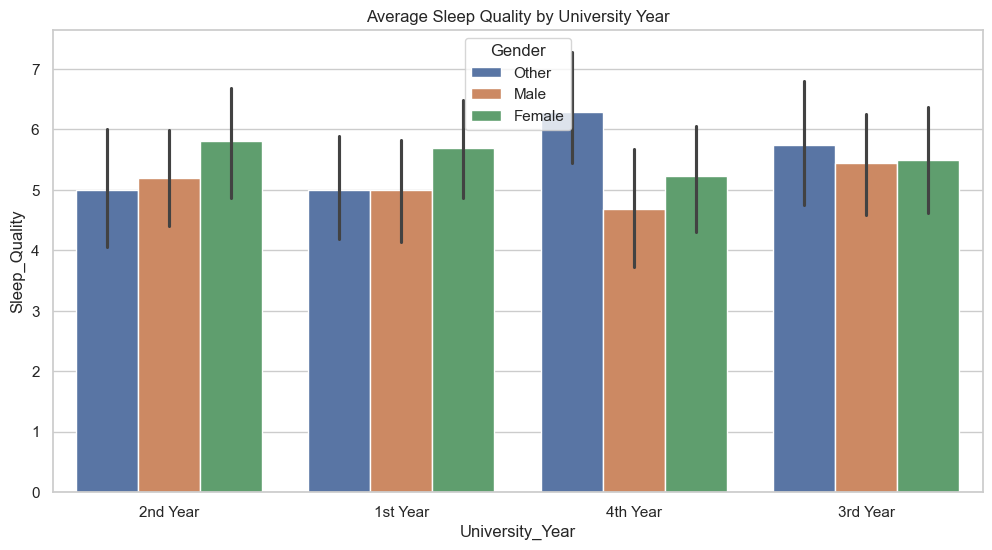

In [54]:
plt.figure()
sns.barplot(x='University_Year', y='Sleep_Quality', data=df, estimator = lambda x: x.mean(), hue = "Gender")
plt.title('Average Sleep Quality by University Year')
plt.show()

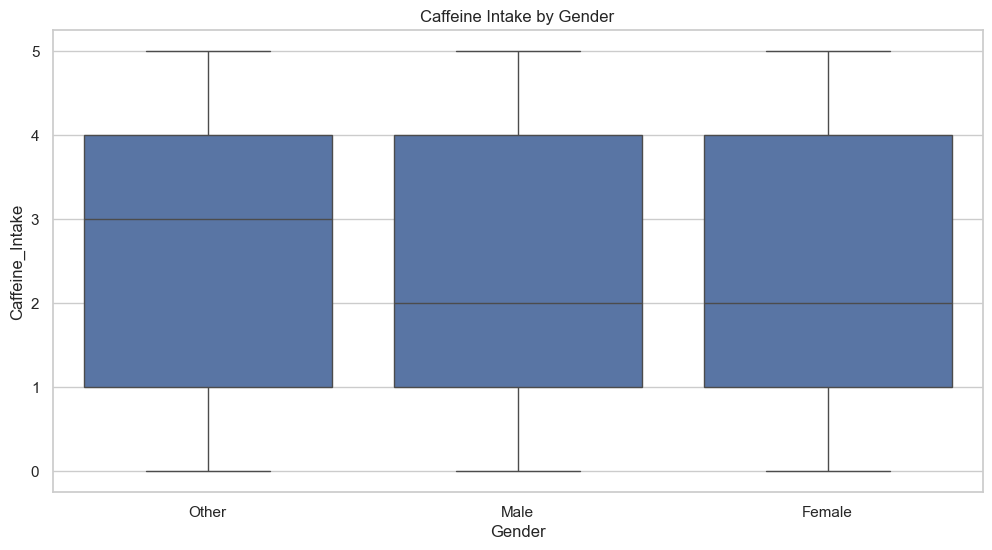

In [55]:
plt.figure()
sns.boxplot(x='Gender', y='Caffeine_Intake', data=df)
plt.title('Caffeine Intake by Gender')
plt.show()

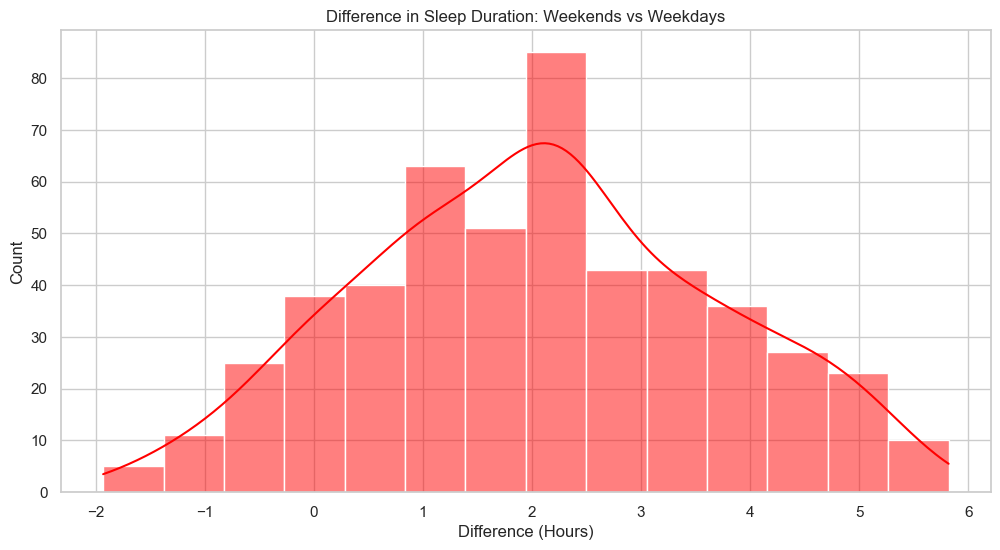

In [56]:
# Calculating difference in sleep duration
df['Weekend_vs_Weekday'] = df['Weekend_Sleep_End'] - df['Weekday_Sleep_End']

plt.figure()
sns.histplot(df['Weekend_vs_Weekday'], kde=True, color="red")
plt.title('Difference in Sleep Duration: Weekends vs Weekdays')
plt.xlabel('Difference (Hours)')
plt.show()
